**This assignment is in two parts. Read the notebook from the beginning and answer the questions as you go. You can add as many cells as you want. Submission instructions are at the end. See Canvas for general rules about Assignments and collaboration.**

# Part 1: The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 8675309, 24601, 1989, 420, 42, 2.7, 0.9, and 0.05 are 8, 2, 1, 4, 4, 2, 9, and 5 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

In [11]:
import pandas as pd

## Question 0

Make a prediction.

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**1. For the first digits, we predict that the distribution will be somewhat even, so around 10% for the digit 1 and 10% for the digit 9.**

**2. For the last digits, we predict that the distribution will be somewhat even similar to first digits, so around 10% for the digit 1 and 10% for the digit 9.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://raw.githubusercontent.com/kevindavisross/data301/main/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the observational unit in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display a few rows of the `DataFrame`.

In [12]:
df_snp = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/sp500.csv")
df_snp = df_snp.set_index("Name")
df_snp

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**The observational unit is a given stock specifically on Feb. 1, 2018. The most natural to use as the index would be the stock name as that is unique for each observation.**

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string; see in particular ["Indexing with `.str`"](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#indexing-with-str).) Make an appropriate visualization to display the distribution of the first digits. (*Hint*: even though this variable is quantitative, you do NOT want a histogram or density plot.)

How does this compare with what you predicted in Question 0?

<Axes: title={'center': 'First Digit of S&P 500 Volume'}, xlabel='First Digit', ylabel='Count'>

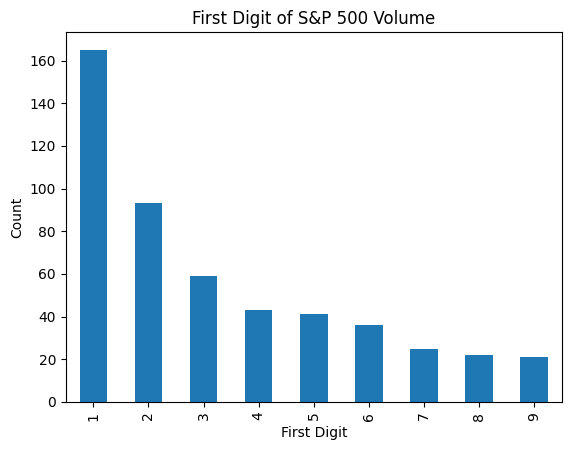

In [13]:
df_snp_first = df_snp["volume"].astype(str).str[0]
df_snp_first.value_counts().plot.bar(xlabel="First Digit", ylabel="Count", title="First Digit of S&P 500 Volume")

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In question 0, we predicted that the distributions of the first digits would be even. However, from the outputted distribution it seems that the first digit is more common to be 1 and less common as it gets higher.

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

<Axes: title={'center': 'Distribution of Last Digit'}, xlabel='Last Digit', ylabel='Frequency'>

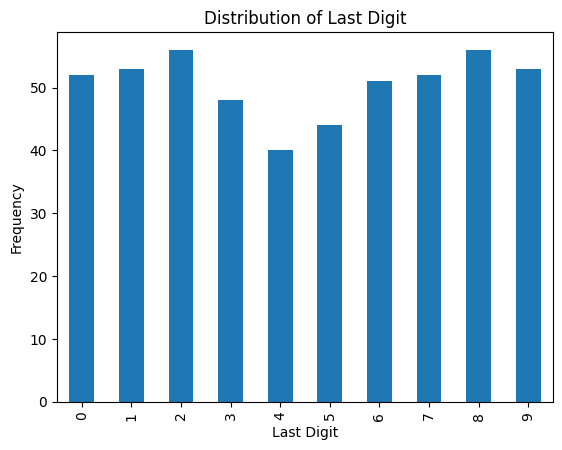

In [14]:
df_snp_last = df_snp["volume"].astype(str).str[-1]
df_snp_last_sorted = df_snp_last.value_counts().sort_index()
df_snp_last_sorted.plot.bar(xlabel="Last Digit", ylabel="Frequency", title="Distribution of Last Digit")

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In this distribution for the last digits, our prediction is somewhat right as in the graph the distribution of the digits is around even.

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas`.)

<Axes: title={'center': 'Distribution of First Digit of Closing Price'}, xlabel='First Digit', ylabel='Frequency'>

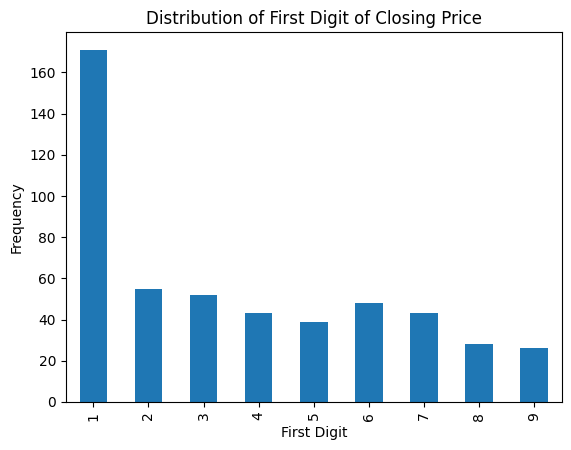

In [15]:
remove_dollar = lambda x: str(x.replace('$', ''))
df_snp["close"] = df_snp["close"].apply(remove_dollar)
df_snp_close_first = df_snp["close"].astype(str).str[0]
df_snp_close_first.value_counts().sort_index().plot.bar(xlabel="First Digit", ylabel="Frequency", title="Distribution of First Digit of Closing Price")

**ENTER YOUR WRITTEN EXPLANATION HERE.**

In this distribution, we found out that pandas infered this variable as a object due to the dollar sign at the beginning of the lcosing price. From this distribution we can see that the number 1 is again the most common first digit in the closing prices of the stocks.

**Note:** The first digit variable is a quantitative variable, since it would make sense to take an average. But it also only takes a limited set of values 1, 2, ..., 9, so in this sense it's like a categorical variable. First digit is an example of a **discrete quantitative variable**. Discrete variables are sometimes treated as quantitative (e.g., compute mean, median, SD) and sometimes treated as categorical (e.g., compute the relative frequency of each value, display the distribution in a bar plot instead of a histogram).

**Further reading:** The distribution of first digits you observed is known as ["Benford's Law"](https://en.wikipedia.org/wiki/Benford%27s_law). [This article](https://towardsdatascience.com/benfords-law-a-simple-explanation-341e17abbe75) gives a good explanation of why Benford's law occurs. This [Shiny applet](https://calpolystat.shinyapps.io/BenfordData/) contains some other data sets where the first digit follows Benford's law.

# Part 2: Choose your own Data!

You will choose a data set and use it to investigate the relationship between two categorical variables. You have lots of flexibility, but you must satisfy the following requirements.

- The data set should be interesting to you personally. If you're working in a group, it should be interesting to everyone in the group.
- The data set needs to have two categorical variables. (It can have more, but you'll only to investigate two categorical variables.)
- At least one of the categorical variables should have more than 2 categories.
- The data set should NOT be one that we have used in class (e.g., NOT Titanic, NOT OKCupid, etc)
- It is ok if you use a data set from a previous course, as long as it's one that you find interesting. But you need to perform the analysis using Pandas.

Recall that the [Introduction to Colab notebook](https://colab.research.google.com/drive/146XB9D9YrQ8ek0Aijm-ea46vEqgm7Hgh?usp=sharing) from the first day of class has some notes about uploading data for use in Colab.

## Question 1

Briefly describe the data. What are the observational units? How many observational units are in the data set? What are the two main variables of interest? How many observational units are missing values of the variables? If you have any other information about how the data was collected --- How were the units selected for the sample? How were the variables measured? --- you can describe it briefly.

In [16]:
df_spotify = pd.read_csv("../content/spotify-2023.csv", encoding="latin-1")
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [17]:
df_spotify["key"].isnull().sum()

95

In [18]:
df_spotify["mode"].isnull().sum()

0

In [19]:
df_spotify["key"].value_counts()

key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64

There are 953 observational units and these are songs. Two main variables of interest are the key and the mode. Yes, there are 95 units missing "key" data and none of the units are missing "mode" data. Units selected are the top spotify songs for 2023. The variables were measured from the information available from Spotify.

## Question 2

Use Pandas to investigate the relationship between the two categorical variables. Your analysis should produce at least one appropriate table and at least one appropriate plot. (Focus on quality not quantity; more is not necessarily better. One table and one plot might be fine if it appropriately summarizes the relationship you are investigating.)

In [20]:
joint_mode_key = pd.crosstab(df_spotify["mode"], df_spotify["key"], normalize=True)
marginal_mode = joint_mode_key.sum(axis=0)
conditional = joint_mode_key.divide(marginal_mode, axis=1)
conditional

key,A,A#,B,C#,D,D#,E,F,F#,G,G#
mode,,,,,,,,,,,
Major,0.56,0.473684,0.432099,0.608333,0.814815,0.363636,0.274194,0.494382,0.410959,0.6875,0.692308
Minor,0.44,0.526316,0.567901,0.391667,0.185185,0.636364,0.725806,0.505618,0.589041,0.3125,0.307692


<Axes: title={'center': 'Relationship between Mode and Key'}, xlabel='Key', ylabel='Proportion'>

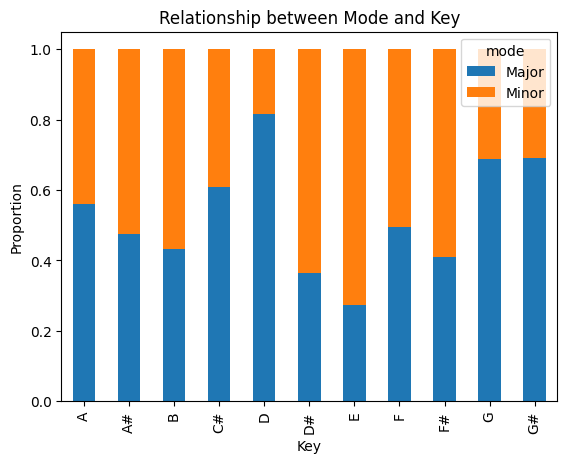

In [27]:
conditional.T.plot.bar(stacked=True, xlabel="Key", ylabel="Proportion", title="Relationship between Mode and Key")

## Question 3

Write a short paragraph describing your conclusions in context. How would you describe the relationship between the two categorical variables? Refer to your analysis from Question 2. You should include some specific numerical values and interpret them in context (e.g., percentage change or percentage point difference).

The "D", "G", "C#", and "G#" keys were more likely to be in the major mode than in the minor mode in the top spotify songs of 2023. On the other hand, the "D#", "E", "F#" keys were more likely to be in the minor mode than the major mode. Interestingly, there were no top songs of spotify 2023 that were in the C key.

In [22]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT.
print((conditional['D']["Major"] - conditional['E']["Major"])*100)

54.0621266427718


Songs in the "D" key were 54 percentage points more likely to be in the major key than the "E" key. From the distribution, D was the popular key to be in the major mode and E was the most popular key to be in the minor mode.

In [23]:
len(conditional.loc["Major"])

11

In [24]:
(conditional.loc["Major"] > 0.5).sum()

5

In [25]:
df_spotify["mode"].value_counts(normalize=True)

mode
Major    0.577125
Minor    0.422875
Name: proportion, dtype: float64

From our original dataset, there were 58% units that were in the Major mode, however we found out that the majority of the keys utilized the minor mode. There were 11 keys but only 5 keys used the major mode. This is an example of the Simpson's Paradox.

## Submission Instructions

- After you have completed the notebook, select **Runtime > Restart and run all**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
- Rename this notebook by clicking on "DATA 301 Assigment - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of ALL partners who collaborated on this assignment.
- Expand all cells with View > Expand Sections
- Save a PDF version: File > Print > Save as PDF
    - Under "More Settings" make sure "Background graphics" is checked
    - Printing to PDF doesn't always work so well and some of your output might get cutoff. That's ok.
    - It's not necessary, but if you want a more nicely formatted PDF you can uncomment and run the code in the following cell. (Here's a [video](https://www.youtube.com/watch?v=-Ti9Mm21uVc) with other options.)
- Download the notebook: File > Download .ipynb
- **Submit the notebook and PDF in Canvas**. If you worked in a team, only one person should submit in Canvas. Add the names of all team members in the comments in the submission in Canvas.

In [26]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('DATA 301 Lab1B - Sreshta Talluri and Ishaan Sathaye.ipynb')